In [2]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,auc, roc_curve, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [17]:
click=pd.read_csv("C:/Users/chenl/Data Science prep/data/link_clicked_table  - Marketing Email Campaign.csv")
open=pd.read_csv("C:/Users/chenl/Data Science prep/data/email_opened_table - Marketing Email Campaign.csv")
email=pd.read_csv("C:/Users/chenl/Data Science prep/data/email_table  - Marketing Email Campaign.csv")
open.info()
# no null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB


In [14]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [15]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  2119 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


In [27]:
# merge 3 PD
open["open"]=1
click["click"]=1
data=pd.merge(email,open,how="left",on="email_id")
data=pd.merge(data,click,how="left",on="email_id")
data["open"]=data["open"].apply(lambda x: 1 if x==1 else 0)
data["click"]=data["click"].apply(lambda x: 1 if x==1 else 0)
data

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0
...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,0,0
99996,899722,long_email,personalized,7,Saturday,US,1,0,0
99997,449610,long_email,personalized,11,Saturday,UK,6,0,0
99998,72497,short_email,generic,10,Monday,UK,0,0,0


# 1
What percentage of users opened the email and what percentage clicked on the link within the email?

In [19]:
click_=len(click["email_id"].unique())/len(email["email_id"].unique())
open_=len(open["email_id"].unique())/len(email["email_id"].unique())
print("clcik%",click_*100 )
print("open%",open_*10)

clcik% 2.119
open% 1.0345


# 2
build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?

classification models: Decision tree for better interpretation, but ensemble tree models to optimize it

EDA

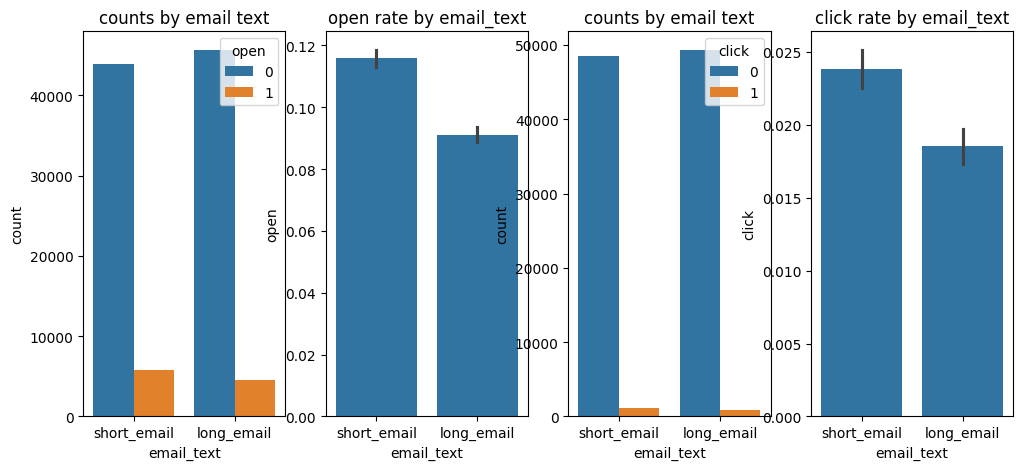

In [66]:
fig, axes=plt.subplots(1,4,figsize=(12,5))

sns.countplot(data=data,x="email_text",ax=axes[0],hue="open")
axes[0].set_title("counts by email text")

sns.barplot(data=data,x="email_text",y="open",ax=axes[1])
axes[1].set_title("open rate by email_text")

sns.countplot(data=data,x="email_text",ax=axes[2],hue="click")
axes[2].set_title("counts by email text")

sns.barplot(data=data,x="email_text",y="click",ax=axes[3])
axes[3].set_title("click rate by email_text")

plt.show()
#short email higher for both

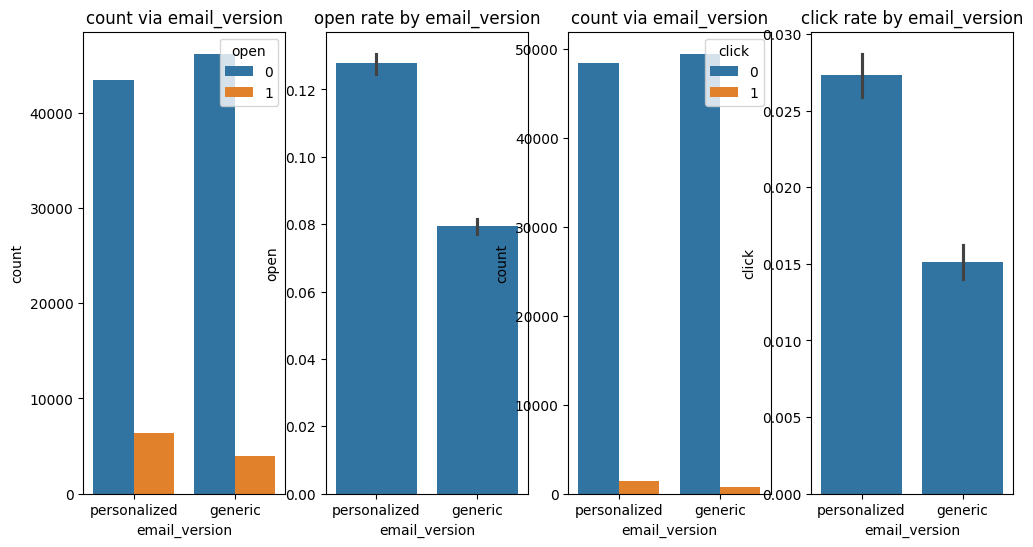

In [64]:
fig, axes=plt.subplots(1,4,figsize=(12,6))

sns.countplot(data=data,x="email_version",ax=axes[0],hue="open")
axes[0].set_title("count via email_version")

sns.barplot(data=data,x="email_version",y="open",ax=axes[1])
axes[1].set_title("open rate by email_version")

sns.countplot(data=data,x="email_version",ax=axes[2],hue="click")
axes[2].set_title("count via email_version")

sns.barplot(data=data,x="email_version",y="click",ax=axes[3])
axes[3].set_title("click rate by email_version")
plt.show()

# personalized works

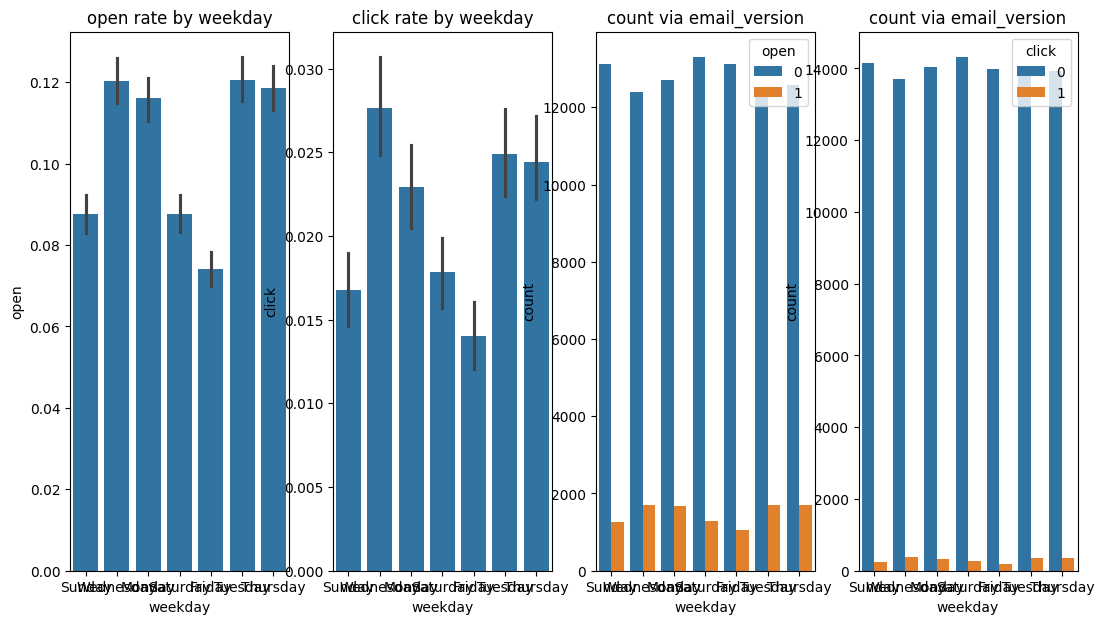

In [69]:
fig, axes=plt.subplots(1,4,figsize=(13,7))

sns.barplot(data=data,x="weekday",y="open",ax=axes[0])
axes[0].set_title("open rate by weekday")

sns.barplot(data=data,x="weekday",y="click",ax=axes[1])
axes[1].set_title("click rate by weekday")

sns.countplot(data=data,x="weekday",ax=axes[2],hue="open")
axes[2].set_title("count via email_version")

sns.countplot(data=data,x="weekday",ax=axes[3],hue="click")
axes[3].set_title("count via email_version")

plt.show()
# weekend days are relative lower rate

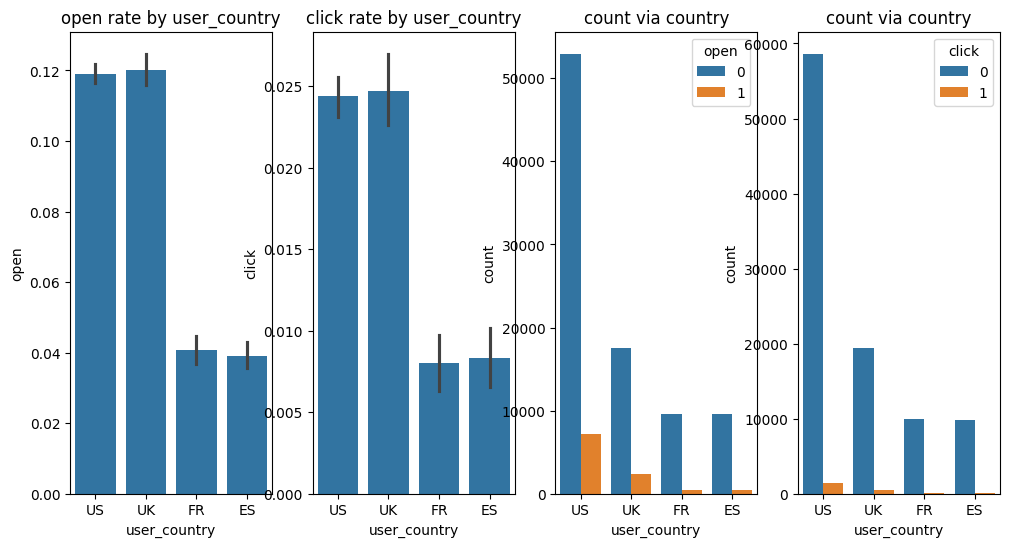

In [71]:
fig, axes=plt.subplots(1,4,figsize=(12,6))

sns.barplot(data=data,x="user_country",y="open",ax=axes[0])
axes[0].set_title("open rate by user_country")

sns.barplot(data=data,x="user_country",y="click",ax=axes[1])
axes[1].set_title("click rate by user_country")

sns.countplot(data=data,x="user_country",ax=axes[2],hue="open")
axes[2].set_title("count via country")

sns.countplot(data=data,x="user_country",ax=axes[3],hue="click")
axes[3].set_title("count via country")

plt.show()
# user_country - US UK higher, and also much higher sample size

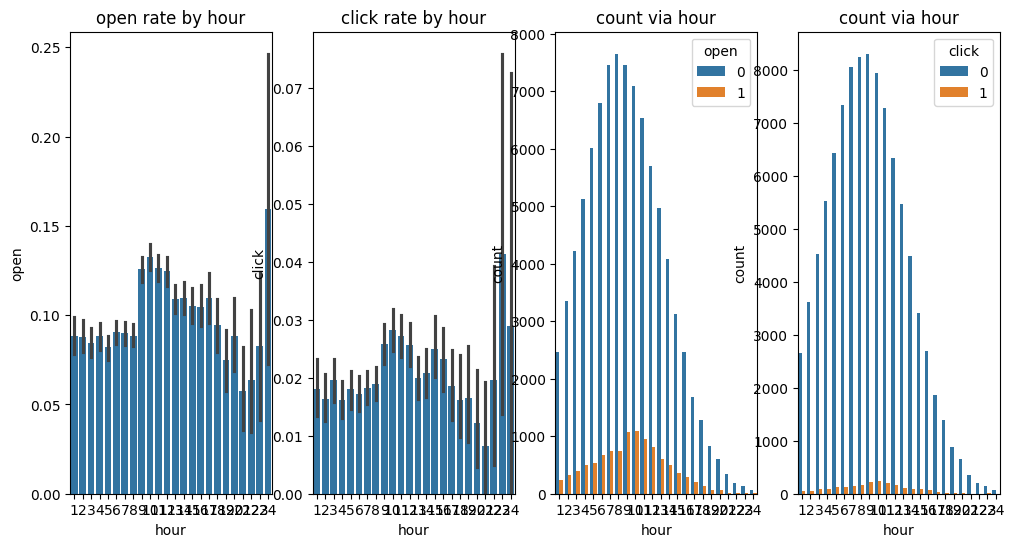

In [75]:
fig, axes=plt.subplots(1,4,figsize=(12,6))

sns.barplot(data=data,x="hour",y="open",ax=axes[0])
axes[0].set_title("open rate by hour")

sns.barplot(data=data,x="hour",y="click",ax=axes[1])
axes[1].set_title("click rate by hour")

sns.countplot(data=data,x="hour",ax=axes[2],hue="open")
axes[2].set_title("count via hour")

sns.countplot(data=data,x="hour",ax=axes[3],hue="click")
axes[3].set_title("count via hour")

plt.show()
# time of day may impact

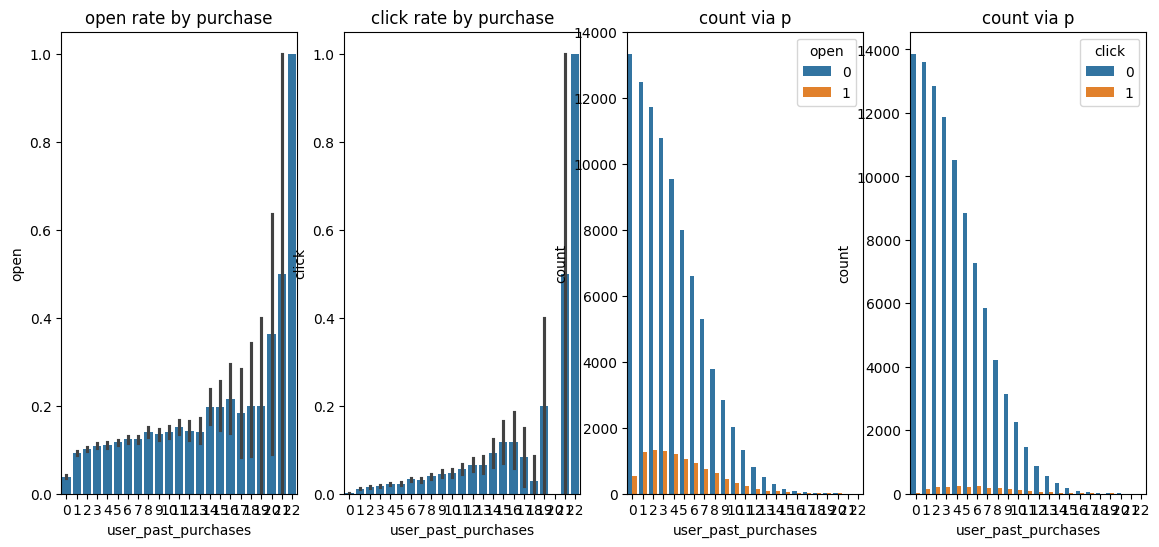

In [73]:
fig, axes=plt.subplots(1,4,figsize=(14,6))

sns.barplot(data=data,x="user_past_purchases",y="open",ax=axes[0])
axes[0].set_title("open rate by purchase")

sns.barplot(data=data,x="user_past_purchases",y="click",ax=axes[1])
axes[1].set_title("click rate by purchase")

sns.countplot(data=data,x="user_past_purchases",ax=axes[2],hue="open")
axes[2].set_title("count via p")

sns.countplot(data=data,x="user_past_purchases",ax=axes[3],hue="click")
axes[3].set_title("count via p")

plt.show()
# pretty clear numerical upward relationship between purchase # and conversion rate

imbalance dataset：sample distribution are highly imbalanced, especaily via purchase count, hour of the day, and country. Would need to adjust those during split for training model

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   open                 100000 non-null  int64 
 8   click                100000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.9+ MB


Index(['email_text', 'email_version', 'weekday', 'user_country'], dtype='object')

In [87]:
#
# from sklearn.preprocessing import OneHotEncoder
# use get_dummies
list=data.select_dtypes(include=["object"]).columns
final_data=pd.get_dummies(data,columns=list,drop_first=False) # keep the first, it's not regression
final_data

,email_id,hour,user_past_purchases,open,click,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_ES,user_country_FR,user_country_UK,user_country_US
0,85120,2,5,0,0,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True
1,966622,12,2,1,1,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False
2,777221,11,2,0,0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True
3,493711,6,1,0,0,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False
4,106887,14,6,0,0,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,803504,4,5,0,0,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True
99996,899722,7,1,0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True
99997,449610,11,6,0,0,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False
99998,72497,10,0,0,0,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False


In [90]:
# split train test
x=final_data.drop(columns=["open","click","email_id"])
y=final_data["click"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100,stratify=y)


# model
Decision Tree: Simple and highly interpretable. Use plot_tree to visualize the decision-making process.e.

Random Forest: A balance between accuracy and interpretability. Feature importance helps explain decisions.

Gradient Boosting (e.g., XGBoost, LightGBM): Highly accurate but harder to interpret. Use SHAP (SHapley Additive exPlanations) for feature contributions.

#database has non-ordinal features, hence best Choices are models that do not assume an ordinal relationship such as Tree-Based classifier Models: Decision Trees, Random Forest, Gradient a


note: use lgb, with its class_weight balance function to grant more weight to minor group
tBoost).

In [109]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score,StratifiedKFold
model=lgb.LGBMClassifier(
    verbose=-1,
    class_weight="balanced",  # Automatically balances weights, click rate is extremly low
    n_estimators=100,           # More trees for better performance
    learning_rate=0.05,         # Lower learning rate for smoother learning
    max_depth=10,               # Prevent overfitting by limiting tree depth
    num_leaves=31,              # Balanced complexity
    min_child_samples=20,       # Prevent overfitting
    subsample=0.8,              # Row sampling
    colsample_bytree=0.8,       # Feature sampling
    lambda_l1=0.1,              # L1 regularization
    lambda_l2=0.1,              # L2 regularization
                        )
model.fit(X_train,y_train)
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
cv_scores=cross_val_score(model,x,y,cv=cv,scoring="f1_weighted")
print("f1 weight score: ",cv_scores)
# model seems stable
y_predict=model.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
print(cm)
report=classification_report(y_test,y_predict)
print(report)
importances=model.feature_importances_
feature_names=x.columns
importance=pd.DataFrame({
    "feature":feature_names,
    "importance": importances
})
print(importance.sort_values(by="importance",ascending=False))

f1 weight score:  [0.76891575 0.77169954 0.75549355 0.76490915 0.77162875]
[[12649  6927]
 [  120   304]]
              precision    recall  f1-score   support

           0       0.99      0.65      0.78     19576
           1       0.04      0.72      0.08       424

    accuracy                           0.65     20000
   macro avg       0.52      0.68      0.43     20000
weighted avg       0.97      0.65      0.77     20000

                       feature  importance
0                         hour         857
1          user_past_purchases         564
4        email_version_generic         167
13             user_country_ES         160
9               weekday_Sunday         148
14             user_country_FR         147
6               weekday_Friday         145
2        email_text_long_email         143
8             weekday_Saturday         120
12           weekday_Wednesday          94
10            weekday_Thursday          81
7               weekday_Monday          77
11      

prediction: capture 72% of true group would click the link, but precision rate is 4%, compare to 2% from original campagin.


0.7449065832440185


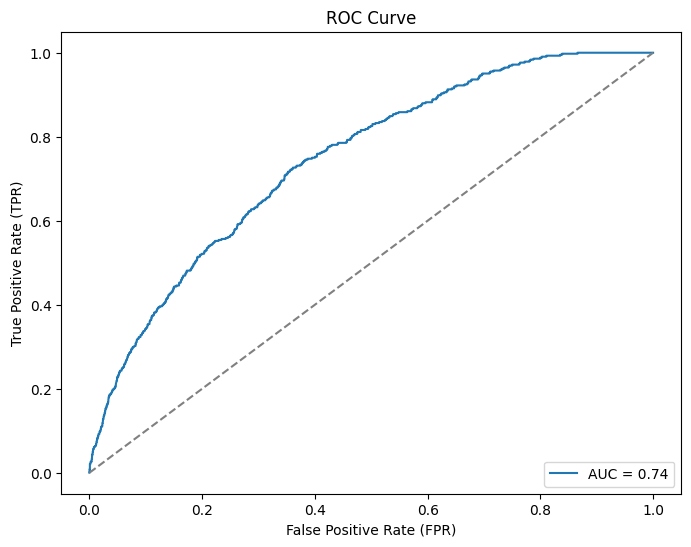

In [117]:
# AUC 
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class, 2nd column - prob for class 1
y_pred = model.predict(X_test) 
auc = roc_auc_score(y_test, y_pred_proba)
print(auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


# 3
By how much do you think your model would improve click through rate (defined as # of users who click on the link / total users who received the email). 


Result: 4% accuracy, that's 2% improvement according to the model, but the model only predict 72% (recall) of the click group size.

How would you test that? 


test: conduct A/B test. randomly assignusers to two groups, control group - with old strategy, send to all; experiemnt group - send to model predicted users. Then perform one-tail t-test to check if e group is statistically significantly higher rate.

# 4
Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.

EDA： 
    open and click ratio are highly corrected across all features, maybe open means it's not in spam? or they are interest to take a peak?
    higher view and click ratio happen during the mid of day, signal a time cyclical pattern per day;
    weekend sent email have lower click ratio;
    significant higher click ratio for frequent buyers, maybe they look actively for promotion?
    short email and non genaric get higher click ratio;
    
MODEL finding: top features are hour, purchase #, version